<a href="https://colab.research.google.com/github/csch7/Computational-Physics/blob/main/Homework-03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return x+(np.sin(x))**2

def int_f(x):
  return x**2/2+x/2-0.25*np.sin(2*x)

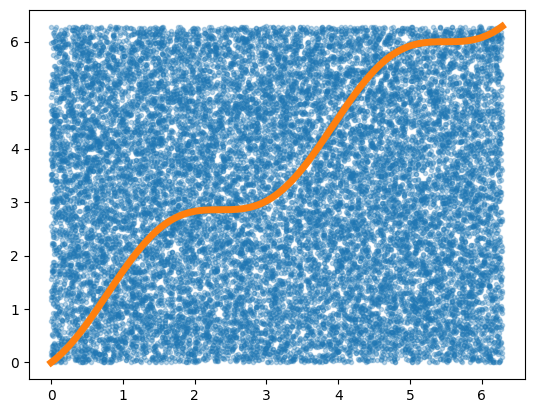

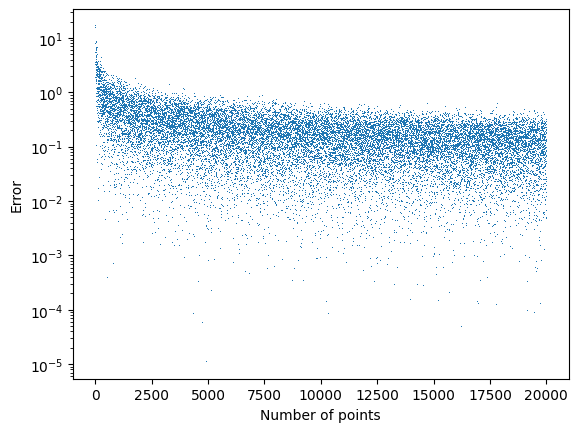

In [13]:
X = np.linspace(0, 2*np.pi, 2000)

n_rand = 20000

ran = max(f(X))-min(f(X))

Xs, Ys = None, None

errs = []
act = int_f(2*np.pi)-int_f(0)

for nr in range(1,n_rand):
  Xs = np.random.random(nr)*2*np.pi
  Ys = np.random.random(nr)*ran+min(f(X))
  errs.append(abs(len(f(Xs)[f(Xs) >= Ys])/nr*(ran*2*np.pi)-act))

plt.plot(Xs, Ys, '.', alpha=0.3)
plt.plot(X, f(X), linewidth = 5)
plt.show()

plt.plot(np.arange(1,n_rand), errs, ',')
plt.ylabel("Error")
plt.xlabel("Number of points")
plt.yscale('log')
plt.show()



Estimated curie temperature (kT): 2.90


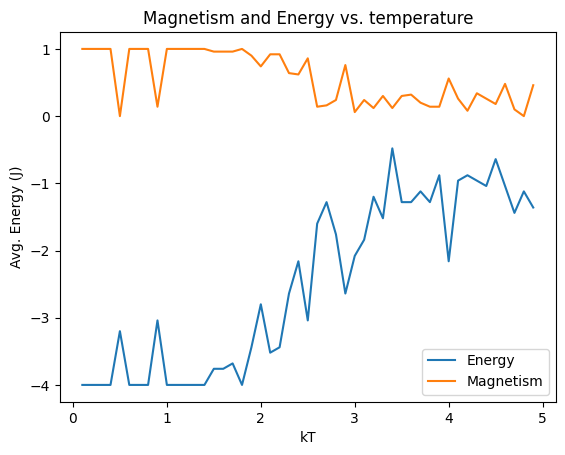

In [35]:
def energy(s, xi, yi):
  idxs = [s[xi-1,yi],s[xi,yi-1]]
  if(xi == np.shape(s)[0]-1):
    idxs.append(s[0,yi])
  else:
    idxs.append(s[xi+1,yi])
  if(yi == np.shape(s)[1]-1):
    idxs.append(s[xi,0])
  else:
    idxs.append(s[xi,yi+1])
  return -1*s[xi,yi]*sum(idxs)


N = 100
n_iter = 10000
kTs = np.arange(0.1, 5, 0.1)



# Xs = np.arange(int(np.sqrt(N)))
# Ys = np.arange(int(np.sqrt(N)))
# X, Y = np.meshgrid(np.arange(int(np.sqrt(N))-1),np.arange(int(np.sqrt(N))-1))

# spins = np.sign(np.random.random((int(np.sqrt(N)),int(np.sqrt(N))))-0.5)
Ms = []
Es = []
avg_Es = []
avg_Ms = []

for kT in kTs:
  spins = np.sign(np.random.random((int(np.sqrt(N)),int(np.sqrt(N))))-0.5)
  Es, Ms = [], []
  for n in range(n_iter):
    xi, yi = np.random.choice(np.arange(int(np.sqrt(N)))), np.random.choice(np.arange(int(np.sqrt(N))))
    E_n = energy(spins, xi, yi)
    spins[xi,yi] *= -1
    E_tr = energy(spins, xi, yi)
    if np.exp(-(E_tr-E_n)/kT) < np.random.random():
      spins[xi,yi] *= -1
    Ms.append(abs(np.mean(spins)))
    Es.append(np.mean([energy(spins, xi, yi) for xi in range(int(np.sqrt(N))) for yi in range(int(np.sqrt(N)))]))
  avg_Es.append(Es[-1])
  avg_Ms.append(Ms[-1])
  # print(Ms[-1], Es[-1])

curie_temp = kTs[np.argsort(avg_Es)[len(kTs)//2]]
print("Estimated curie temperature (kT): {:.2f}".format(curie_temp))

plt.plot(kTs, avg_Es, label = "Energy")
plt.plot(kTs, avg_Ms, label = "Magnetism")
plt.xlabel("kT")
plt.ylabel("Avg. Energy (J)")
plt.legend()
plt.title("Magnetism and Energy vs. temperature")
plt.show()